Loading class 42: 100%|██████████| 240/240 [00:06<00:00, 39.13it/s] 


Data shape: (39237, 30, 30, 3)
Labels shape: (39237,)
X_train shape: (31389, 30, 30, 3)
X_test shape: (7848, 30, 30, 3)
y_train shape: (31389, 43)
y_test shape: (7848, 43)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3924 - loss: 2.2556 - val_accuracy: 0.9466 - val_loss: 0.1771
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9169 - loss: 0.2720 - val_accuracy: 0.9829 - val_loss: 0.0710
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9511 - loss: 0.1612 - val_accuracy: 0.9888 - val_loss: 0.0398
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9654 - loss: 0.1137 - val_accuracy: 0.9912 - val_loss: 0.0324
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9681 - loss: 0.1016 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9746 - loss: 0.0838 - val_accuracy: 0.9917 - val_loss: 0.0307
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9795 - loss: 0.0706 - val_accuracy: 0.9932 - val_loss: 0.0269
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9796 - loss: 0.0664 - val_accuracy: 

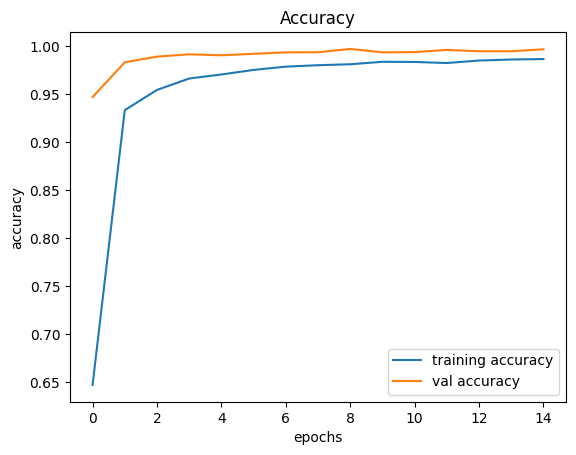

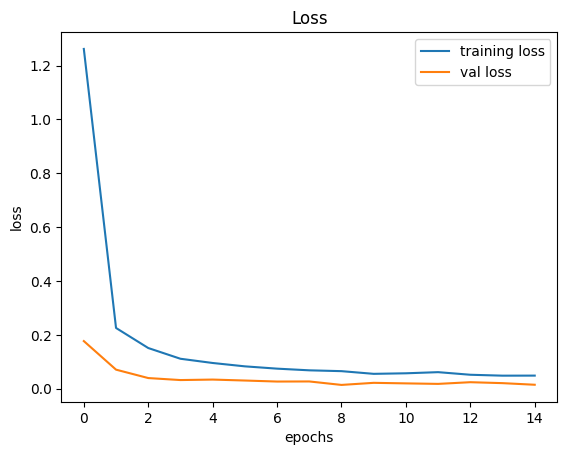

Loading test images: 100%|██████████| 12630/12630 [2:39:56<00:00,  1.32it/s]


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


0.975771971496437


In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from tqdm import tqdm

cur_path = '/content/drive/MyDrive/Colab Notebooks/Traffic'
train_path = os.path.join(cur_path, 'Train')
test_path = os.path.join(cur_path, 'Test')
classes = 43

# Load or process train images


data = []
labels = []
for i in range(classes):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)
    for img_name in tqdm(images, desc=f"Loading class {i}"):
        img_path = os.path.join(path, img_name)
        try:
            image = cv2.imread(img_path)
            image = cv2.resize(image, (30,30))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image:", img_path)
data = np.array(data) / 255.0
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

X_train, X_test , y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("traffic_classifier.h5")

#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


#testing accuracy on test dataset
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Traffic/Test1.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]
for img in tqdm(imgs, desc="Loading test images"):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Colab Notebooks/Traffic', img))
    image = cv2.resize(image, (30,30))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(np.array(image))

X_test=np.array(data)
X_test = X_test / 255.0

pred = np.argmax(model.predict(X_test), axis=1)

#Accuracy with the test data
print(accuracy_score(labels, pred))
model.save("/content/drive/MyDrive/Colab Notebooks/Traffic/traffic_classifier(2).h5")